In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url="house_prices.csv"
house = pd.read_csv(url)
house.head(n=10)

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
5,14115,143000
6,10084,307000
7,10382,200000
8,6120,129900
9,7420,118000


In [4]:
house.shape

(1326, 2)

In [6]:
house.isnull().sum()

LotArea      0
SalePrice    0
dtype: int64

In [11]:
mean= np.mean(house.SalePrice)
mean

167433.0422322775

In [14]:
median=np.median(house.SalePrice)
median

157000.0

In [17]:
house.describe()

,LotArea,SalePrice
count,1326.000000,1326.000000
mean,9076.268477,167433.042232
std,3119.870831,57192.320151
min,1300.000000,34900.000000
25%,7253.750000,128000.000000
50%,9127.500000,157000.000000
75%,10963.500000,200000.000000
max,17400.000000,326000.000000


In [ ]:
#quartile
#q1= 0.25 ()
#q3=0.75 
#iqr= q3-q1 (data more clustered) #interquartile range


In [19]:
q1=house.SalePrice.quantile(0.25)
q1

128000.0

In [24]:
q3= house.SalePrice.quantile(0.75)
q3

200000.0

In [25]:
iqr= q3-q1
iqr

72000.0

In [26]:
house.LotArea.unique()

array([ 8450,  9600, 11250,  9550, 14260, 14115, 10084, 10382,  6120,
        7420, 11200, 12968, 10652, 10920, 11241, 10791, 13695,  7560,
       14215,  7449,  9742,  4224,  8246, 14230,  7200, 11478, 16321,
        6324,  8500,  8544, 11049, 10552,  7313, 13418, 10859,  8532,
        7922,  6040,  8658, 16905,  9180,  9200,  7945,  7658, 12822,
       11096,  4456,  7742, 13869,  6240,  8472,  7134, 10175,  2645,
       11645, 13072,  6442, 10300,  9375,  9591, 10665,  4608, 15593,
       13651,  7599, 10141, 10200,  5790,  1596,  8475,  8635, 10778,
       10440, 13000,  4500, 10206,  8892,  8530, 16059, 11911,  3951,
        8470,  8070, 13360,  9337,  9765, 10264, 10921, 10625,  9320,
       10603,  9206,  7018, 10402,  7758, 10800,  6000, 11751,  9525,
        7750,  7259,  3230, 11616,  8536, 12376,  8461,  6060,  9464,
        7892, 17043,  6780,  4928,  4388,  7590,  8973, 14200, 12224,
        7388,  6853, 10335, 10400, 10355, 11070,  9066, 15426, 10500,
        8520,  9100,

In [30]:
house.dtypes

LotArea      int64
SalePrice    int64
dtype: object

In [32]:
house.groupby("LotArea").mean()

,SalePrice
LotArea,
1300,124000.0
1477,80000.0
1491,75500.0
1526,86000.0
1533,94500.0
...,...
17104,179665.0
17120,134432.0
17140,135000.0


In [35]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LotArea    1326 non-null   int64
 1   SalePrice  1326 non-null   int64
dtypes: int64(2)
memory usage: 20.8 KB


In [37]:
x=house[["LotArea","SalePrice"]]
corr=x.corr()

,LotArea,SalePrice
LotArea,1.000000,0.390102
SalePrice,0.390102,1.000000


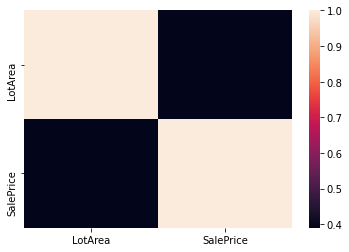

In [40]:
sns.heatmap(corr)
corr

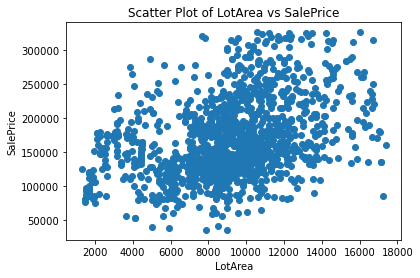

In [3]:
plt.scatter(x =house.LotArea, y = house.SalePrice)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("Scatter Plot of LotArea vs SalePrice")
plt.show()

<AxesSubplot:xlabel='LotArea'>

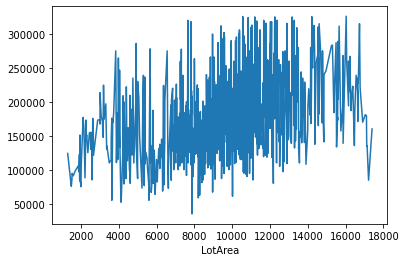

In [5]:
house.groupby("LotArea")["SalePrice"].median().plot()

<AxesSubplot:>

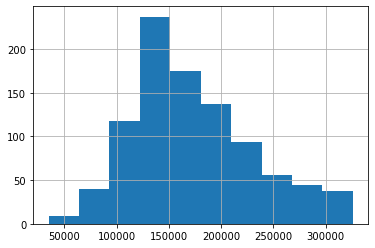

In [6]:
house.groupby("LotArea")["SalePrice"].median().hist()

# Split Dataset

In [7]:
X = house.drop("LotArea", axis = "columns")
y = house.drop("SalePrice", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (1326, 1)
shape of y =  (1326, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

#80% data in training , remaining 20% for testing

shape of X_train =  (1060, 1)
shape of y_train =  (1060, 1)
shape of X_test =  (266, 1)
shape of y_test =  (266, 1)


# Model Training

In [12]:
 # y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
m=lr.coef_

In [29]:
c=lr.intercept_

In [40]:
#y=mx+c
y=m*8450+c
y

array([[5768.8869247]])

In [41]:
lr.predict([[6120]])[0][0].round(2) #almost same

5721.41

In [33]:
y_pred=lr.predict(X_test)
y_pred

array([[ 8397.22509609],
       [ 8275.99554478],
       [ 9345.66805639],
       [ 7389.69546372],
       [ 8856.67490823],
       [ 6839.57817204],
       [10201.40606569],
       [ 8652.92776316],
       [11705.0599963 ],
       [ 9029.85998154],
       [ 8347.30704555],
       [ 9422.07323579],
       [ 8856.67490823],
       [ 7461.0069645 ],
       [ 9203.04505484],
       [11444.26365061],
       [ 9139.88343987],
       [10894.14635892],
       [ 8907.61169449],
       [ 8714.05190668],
       [ 9182.67034034],
       [10282.90492371],
       [ 9264.16919837],
       [ 8815.92547921],
       [10079.15777864],
       [ 8551.05419062],
       [10262.53020921],
       [ 8569.39143368],
       [ 7450.81960725],
       [ 8815.92547921],
       [10347.4927687 ],
       [ 9610.53934498],
       [ 7277.63453394],
       [ 7878.68861189],
       [ 9364.00529945],
       [ 7939.81275541],
       [ 8591.80361964],
       [ 9213.2324121 ],
       [ 8510.30476161],
       [ 8214.87140126],


In [42]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["LotArea", "SalePrice_original","SalePrice_predicted"])

,LotArea,SalePrice_original,SalePrice_predicted
0,137450.0,6171.0,8397.225096
1,131500.0,12150.0,8275.995545
2,184000.0,7472.0,9345.668056
3,88000.0,1680.0,7389.695464
4,160000.0,17400.0,8856.674908
...,...,...,...
261,132500.0,6000.0,8296.370259
262,110000.0,11475.0,7837.939183
263,176500.0,11029.0,9192.857698
264,257000.0,10994.0,10833.022215


In [35]:
lr.score(X_test,y_test)

0.17504844762412253

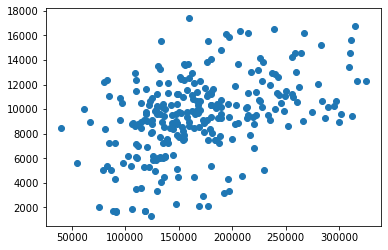

In [36]:
plt.scatter(X_test, y_test)

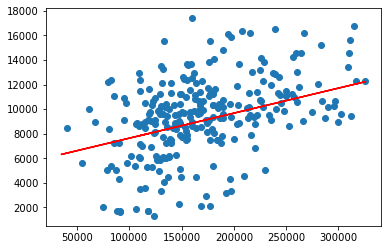

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [27]:
#Failed Model

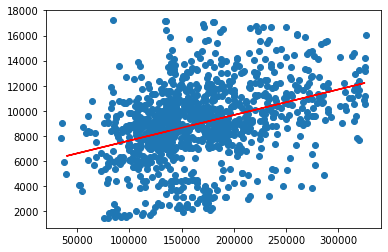

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [50]:
lr.predict([[8450]]).round(2) #worst model

array([[5768.89]])